In [33]:
from affinewarp import PiecewiseWarping, SpikeData
import numpy as np
from affinewarp.visualization import rasters    
import matplotlib.pyplot as plt

In [4]:
mid_brain_circuits=['SCs','SCm','MRN','APN','PAG','ZI']
frontal_circuits=['MOs','PL','ILA','ORB','MOp','SSp']
all_data_path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files'

(260, 2)
5.0
65.94206677043901


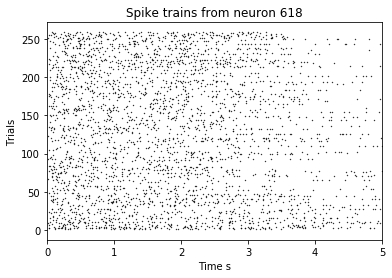

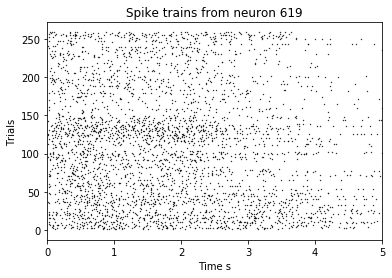

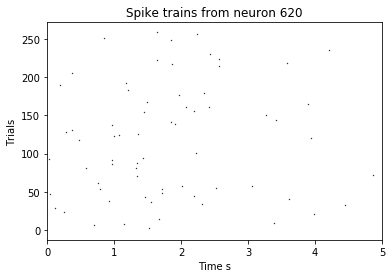

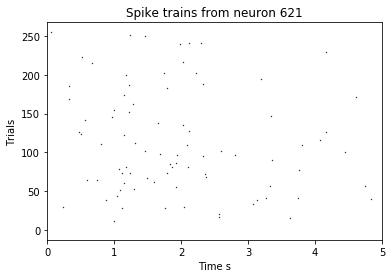

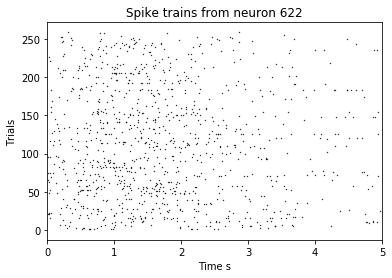

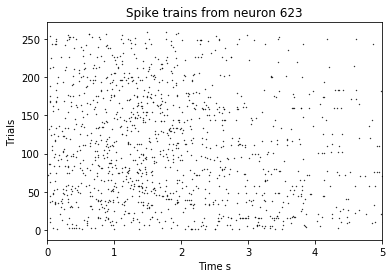

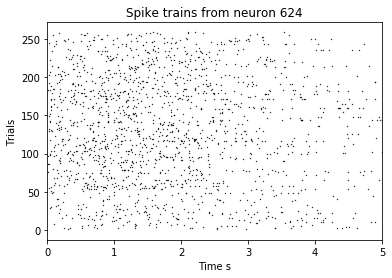

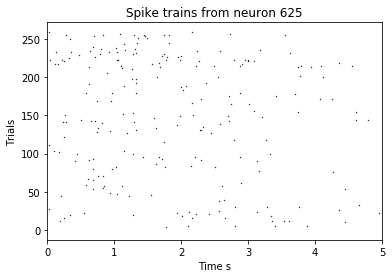

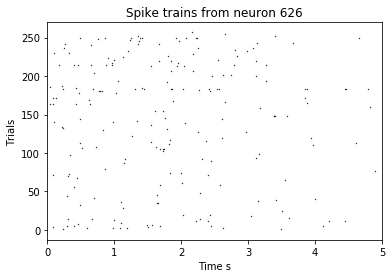

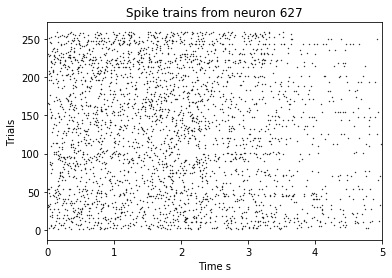

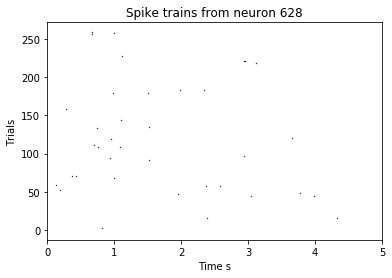

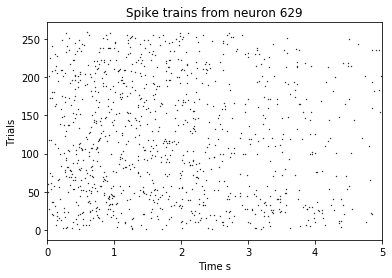

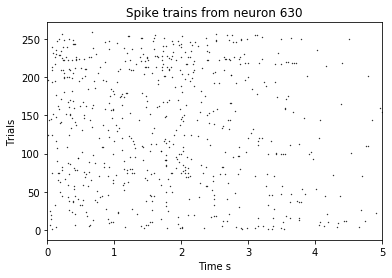

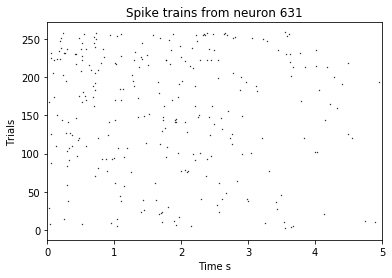

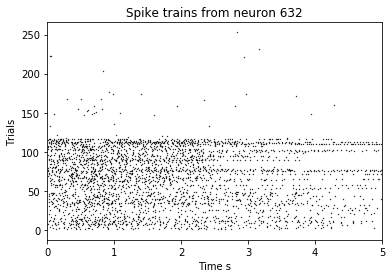

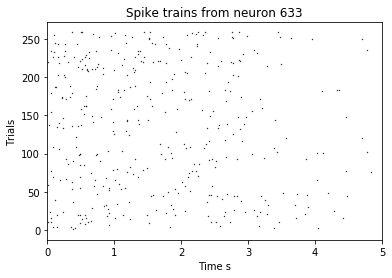

  0%|          | 0/50 [00:00<?, ?it/s]

5.0
0


Loss improvement: 12.21%:  92%|█████████▏| 46/50 [01:49<00:09,  2.45s/it]

In [ ]:
def make_one_neuron_trials_array():
    selected_recordings=['Richards_2017-10-31.tar']
    path=all_data_path+'/'+selected_recordings[0]
    neuron_inds=np.load(path+'/'+'spikes.clusters.npy')
    spk_tms=np.load(path+'/'+'spikes.times.npy')
    trials_orig=np.load(path+'/'+'trials.intervals.npy')
    print(trials_orig.shape)
    #Behavioral data
    #mot_timestamps=np.load(path+'/'+'face.timestamps.npy')
    #mot_energy=np.load(path+'/'+'face.motionEnergy.npy')

    #spk_ids=np.where(neuron_inds==618)
    #spk_tms_one_neuron=spk_tms[spk_ids]
    
    spikes=[]
    neurons=[]
    trials=[]
    neurons_orig=range(618,618+16)
    for neuron in neurons_orig:
        spk_ids=np.where(neuron_inds==neuron)
        spk_tms_one_neuron=spk_tms[spk_ids]
        for trial in range(0,260):
            trial_range= np.bitwise_and(spk_tms_one_neuron>=trials_orig[trial][0],spk_tms_one_neuron<=trials_orig[trial][1])
            if trial==0:
                #trial_range= np.bitwise_and(spk_tms_one_neuron>=trials[trial][0],spk_tms_one_neuron<=trials[trial][1])
                subset=spk_tms_one_neuron[trial_range]
            else:
                subset=spk_tms_one_neuron[trial_range]-trials_orig[trial-1][1]
            for spike in subset:
                trials.append(trial)
                spikes.append(spike)
                neurons.append(neuron)
        #Select spikes in the trial for the neuron that we care about
        #subset=spk_tms_one_neuron[trial_range]
        
        #print(subset)
        #print(trial_range)
    #print(neurons)
    data = SpikeData(trials, spikes, neurons, tmin=0, tmax=5.0)
    print(data.tmax)
    print(np.max(spikes))
    #BINSIZE = 10.0   # ms
    #NBINS = int((data.tmax - data.tmin) / BINSIZE)
    #MAXLAG = 0.1
    #print(NBINS)
    #spikes=spikes[:6000]
    #neurons=neurons[:6000]
    #trials=trials[:6000]
    #binned = data.bin_spikes(NBINS)
    scatter_kw = dict(s=2, c='k', lw=0, alpha=.8)
    for n in range(618,618+16):
        idx=data.neurons==n
        y, x = data.trials[idx], data.spiketimes[idx]
        #print(x)
        #print(y,x)
        plt.scatter(x, y,**scatter_kw)
        plt.title('Spike trains from neuron '+str(n))
        plt.xlabel('Time s')
        plt.ylabel('Trials')
        plt.xlim(0,5)
        plt.show()
        
    
    BINSIZE = 0.1   # ms
    print(data.tmax)
    print(data.tmin)
    NBINS = int((data.tmax - data.tmin) / BINSIZE)
    MAXLAG = 0.1
    
    binned = data.bin_spikes(NBINS)
    

    from affinewarp.visualization import rasters
    from affinewarp import PiecewiseWarping

    lin_model = PiecewiseWarping() # Note, can add smoothness regularization here, if desired.
    lin_model.fit(binned)
    lin_aligned_data = lin_model.transform(data)
    
    for n in range(618,618+16):
        _d = lin_aligned_data.select_neurons(n)
        y, x = _d.trials, _d.spiketimes
        plt.scatter(x, y, **scatter_kw)
        plt.title('Sorted spike trains from neuron '+str(n))
        plt.xlabel('Time s')
        plt.ylabel('Trials')
        plt.xlim(0,5)
        plt.show()
        
    print(lin_aligned_data.shape)

    rasters(lin_aligned_data)
    
make_one_neuron_trials_array()